The results from the 1st calibration analysis seems funny, only 1 year of data at each depth is simulated at a time instead of 3 years! - What might be wrong?
- Checking first with the ats simulations! 

In [11]:
%matplotlib inline
import sys,os
import numpy as np
import matplotlib.cm
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import h5py
import pandas as pd
from datetime import datetime

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
import os
print(os.getcwd())

/home/rk/Article_1/5_calib/Case1_calib/Case1_start.demo


In [14]:
sim_data = pd.read_csv('test_ats.demo/observations.dat',skiprows=88,sep=' ')
sim_data

,time [s],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],point -0.04 saturation liquid,point -0.1 saturation liquid,point -0.2 saturation liquid,point -0.4 saturation liquid,point -0.8 saturation liquid,point -1.2 saturation liquid,point -1.6 saturation liquid
0,0.0,258.367326,259.833831,261.545082,262.858144,264.988292,266.860213,268.139169,0.224325,0.224325,0.224325,0.159498,0.159500,0.159504,0.159509
1,86400.0,260.937752,261.528776,262.625293,263.403539,264.993725,266.718276,267.981751,0.224325,0.224325,0.224326,0.159498,0.159500,0.159504,0.159508
2,172800.0,260.913298,261.910368,263.053829,263.753338,265.097135,266.643356,267.853158,0.224325,0.224326,0.224326,0.159499,0.159501,0.159504,0.159508
3,259200.0,260.775236,261.993762,263.251563,263.958150,265.192479,266.600528,267.748289,0.224325,0.224326,0.224326,0.159499,0.159501,0.159504,0.159507
4,345600.0,260.415630,261.872205,263.295109,264.052260,265.259164,266.572964,267.662398,0.224325,0.224326,0.224326,0.159499,0.159501,0.159504,0.159507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,94348800.0,257.454881,260.367610,263.203169,264.627391,266.551927,268.008245,268.956819,0.224325,0.224325,0.224326,0.159500,0.159504,0.159508,0.159513
1093,94435200.0,257.091875,260.099388,262.979183,264.421391,266.373268,267.857476,268.828016,0.224325,0.224325,0.224326,0.159500,0.159503,0.159508,0.159512
1094,94521600.0,256.383556,259.627674,262.667766,264.173499,266.185322,267.703873,268.697651,0.224325,0.224325,0.224326,0.159499,0.159503,0.159507,0.159511
1095,94608000.0,257.177299,259.870613,262.625020,264.042143,266.016902,267.552088,268.566665,0.224325,0.224325,0.224326,0.159499,0.159502,0.159506,0.159511


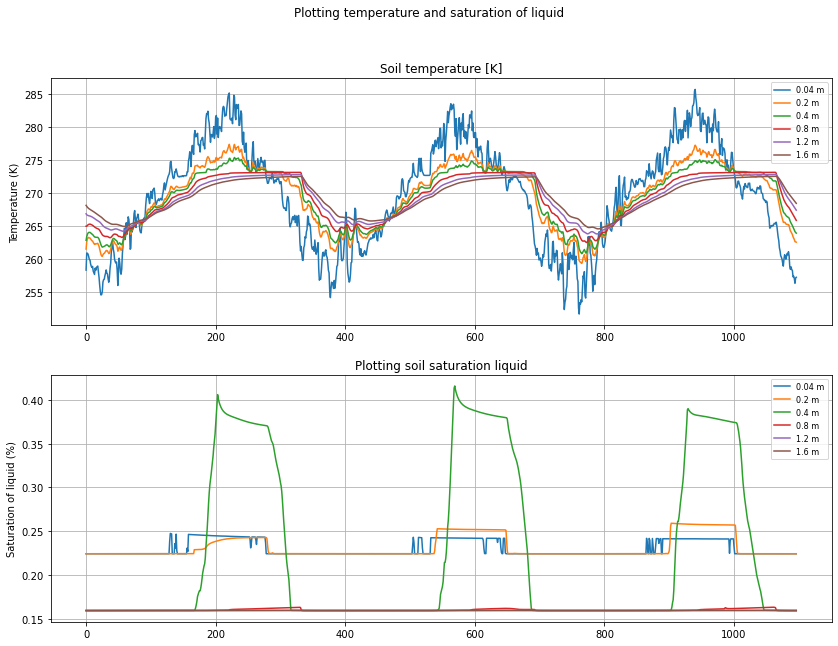

In [15]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(w=14,h=10)
fig.suptitle('Plotting temperature and saturation of liquid')

ax1.set_title('Soil temperature [K]')
#ax1.plot(sim_data['point -0.01 temperature [K]'],label='0.01 m')
ax1.plot(sim_data['point -0.04 temperature [K]'],label='0.04 m')
ax1.plot(sim_data['point -0.2 temperature [K]'],label='0.2 m')
ax1.plot(sim_data['point -0.4 temperature [K]'],label='0.4 m')
ax1.plot(sim_data['point -0.8 temperature [K]'],label='0.8 m')
ax1.plot(sim_data['point -1.2 temperature [K]'],label='1.2 m')
ax1.plot(sim_data['point -1.6 temperature [K]'],label='1.6 m')
#ax1.plot(sim_data['point -5.0 temperature [K]'],label='5.0 m')
#ax1.plot(sim_data['point -10.0 temperature [K]'],label='10.0 m')
#ax1.plot(sim_data['point -20.0 temperature [K]'],label='20.0 m')
#ax1.plot(sim_data['point -30.0 temperature [K]'],label='30.0 m')
#ax1.plot(sim_data['point -40.0 temperature [K]'],label='40.0 m')
ax1.set_ylabel('Temperature (K)')
#ax1.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax1.set_xlabel('Date (days)')
ax1.legend(fontsize=8)
ax1.grid(True)

ax2.set_title('Plotting soil saturation liquid')
#ax2.plot(sim_data['point -0.01 saturation liquid'],label='0.01 m')
ax2.plot(sim_data['point -0.04 saturation liquid'],label='0.04 m')
ax2.plot(sim_data['point -0.2 saturation liquid'],label='0.2 m')
ax2.plot(sim_data['point -0.4 saturation liquid'],label='0.4 m')
ax2.plot(sim_data['point -0.8 saturation liquid'],label='0.8 m')
ax2.plot(sim_data['point -1.2 saturation liquid'],label='1.2 m')
ax2.plot(sim_data['point -1.6 saturation liquid'],label='1.6 m')
#ax2.plot(sim_data['point -5.0 saturation liquid'],label='5.0 m')
#ax2.plot(sim_data['point -10.0 saturation liquid'],label='10.0 m')

ax2.set_ylabel('Saturation of liquid (%)')
#ax2.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax2.xlabel('Date (days)')
ax2.legend(fontsize=8)
ax2.grid(True)